# setup

In [2]:
apikey = '#####'
secret = '#####'

In [6]:
!pip install python-binance pandas mplfinance

# Authenticate

In [8]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

In [9]:
client = Client(apikey, secret)

# Get Tickers

In [10]:
tickers = client.get_all_tickers()

In [11]:
tickers

[{'symbol': 'ETHBTC', 'price': '0.05410000'},
 {'symbol': 'LTCBTC', 'price': '0.00121100'},
 {'symbol': 'BNBBTC', 'price': '0.00922800'},
 {'symbol': 'NEOBTC', 'price': '0.00017450'},
 {'symbol': 'QTUMETH', 'price': '0.00075300'},
 {'symbol': 'EOSETH', 'price': '0.00017170'},
 {'symbol': 'SNTETH', 'price': '0.00000722'},
 {'symbol': 'BNTETH', 'price': '0.00018020'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00005790'},
 {'symbol': 'BNBETH', 'price': '0.17060000'},
 {'symbol': 'BTCUSDT', 'price': '57945.57000000'},
 {'symbol': 'ETHUSDT', 'price': '3135.65000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00000024'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [12]:
tickers[1]['price']

'0.00121100'

In [13]:
ticker_df = pd.DataFrame(tickers)

In [14]:
ticker_df.head()

,symbol,price
0,ETHBTC,0.05410000
1,LTCBTC,0.00121100
2,BNBBTC,0.00922800
3,NEOBTC,0.00017450
4,QTUMETH,0.00075300


In [15]:
ticker_df.tail()

,symbol,price
2678,WIFBRL,8.89000000
2679,ZKUSDC,0.15860000
2680,ZROUSDC,3.76300000
2681,IOUSDC,2.47200000
2682,1000SATSUSDC,0.00020760


In [16]:
ticker_df.set_index('symbol', inplace=True)

In [17]:
float(ticker_df.loc['ETHBTC']['price'])

0.0541

# Get Depth

In [18]:
depth = client.get_order_book(symbol='BTCUSDT')

In [19]:
depth

{'lastUpdateId': 48796632435,
 'bids': [['57932.00000000', '8.60848000'],
  ['57931.99000000', '0.00020000'],
  ['57931.74000000', '0.00172000'],
  ['57931.72000000', '0.00020000'],
  ['57930.74000000', '0.05117000'],
  ['57930.71000000', '0.04840000'],
  ['57930.62000000', '0.00414000'],
  ['57930.58000000', '0.00172000'],
  ['57930.40000000', '0.00018000'],
  ['57930.29000000', '0.06144000'],
  ['57930.25000000', '0.23049000'],
  ['57930.00000000', '0.08377000'],
  ['57929.94000000', '0.00552000'],
  ['57929.69000000', '0.04316000'],
  ['57929.59000000', '0.00432000'],
  ['57929.45000000', '0.04000000'],
  ['57929.42000000', '0.00172000'],
  ['57929.35000000', '0.17399000'],
  ['57929.34000000', '0.28991000'],
  ['57929.30000000', '0.00725000'],
  ['57928.50000000', '0.13820000'],
  ['57928.41000000', '0.00570000'],
  ['57928.39000000', '0.11000000'],
  ['57928.38000000', '0.12157000'],
  ['57928.26000000', '0.00172000'],
  ['57928.23000000', '0.04173000'],
  ['57928.09000000', '0.00

In [20]:
depth_df = pd.DataFrame(depth['asks'])
depth_df.columns = ['Price', 'Volume']
depth_df.head()

,Price,Volume
0,57932.01000000,0.34454000
1,57932.02000000,0.07014000
2,57932.12000000,0.00051000
3,57932.13000000,0.00051000
4,57932.14000000,0.00071000


In [21]:
depth_df.dtypes

Price     object
Volume    object
dtype: object

# Get Historical Data

In [22]:
#  [
#   [
#     1499040000000,      // Open time
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815",  // Volume
#     1499644799999,      // Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "17928899.62484339" // Ignore.
#   ]
# ]

In [23]:
client.get_historical_klines??

In [24]:
historical = client.get_historical_klines('ETHBTC', Client.KLINE_INTERVAL_1DAY, '1 Jan 2011')

In [25]:
historical

[[1499990400000,
  '0.08000000',
  '0.09103300',
  '0.08000000',
  '0.09099300',
  '1942.05700000',
  1500076799999,
  '170.23852396',
  1994,
  '1076.40500000',
  '94.82527222',
  '0'],
 [1500076800000,
  '0.09099300',
  '0.09369900',
  '0.08712700',
  '0.08763500',
  '4013.06600000',
  1500163199999,
  '363.03178785',
  4623,
  '2250.31800000',
  '203.54149755',
  '0'],
 [1500163200000,
  '0.08750800',
  '0.08763500',
  '0.07559100',
  '0.08224100',
  '8904.15800000',
  1500249599999,
  '722.21248196',
  8137,
  '5557.57500000',
  '450.34388688',
  '0'],
 [1500249600000,
  '0.08236800',
  '0.08839400',
  '0.08169900',
  '0.08753700',
  '6650.93300000',
  1500335999999,
  '568.24653804',
  7639,
  '3859.48500000',
  '329.66875309',
  '0'],
 [1500336000000,
  '0.08783100',
  '0.10906800',
  '0.08477700',
  '0.10773200',
  '7245.74100000',
  1500422399999,
  '674.49785037',
  8121,
  '4202.05500000',
  '393.11140275',
  '0'],
 [1500422400000,
  '0.10773200',
  '0.10873200',
  '0.0842900

In [26]:
hist_df = pd.DataFrame(historical)

In [27]:
hist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1499990400000,0.08000000,0.09103300,0.08000000,0.09099300,1942.05700000,1500076799999,170.23852396,1994,1076.40500000,94.82527222,0
1,1500076800000,0.09099300,0.09369900,0.08712700,0.08763500,4013.06600000,1500163199999,363.03178785,4623,2250.31800000,203.54149755,0
2,1500163200000,0.08750800,0.08763500,0.07559100,0.08224100,8904.15800000,1500249599999,722.21248196,8137,5557.57500000,450.34388688,0
3,1500249600000,0.08236800,0.08839400,0.08169900,0.08753700,6650.93300000,1500335999999,568.24653804,7639,3859.48500000,329.66875309,0
4,1500336000000,0.08783100,0.10906800,0.08477700,0.10773200,7245.74100000,1500422399999,674.49785037,8121,4202.05500000,393.11140275,0


In [28]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [29]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
2552,1720483200000,0.05324000,0.05379000,0.05276000,0.05283000,25092.27990000,1720569599999,1340.32836011,171377,12151.85940000,649.31812168,0
2553,1720569600000,0.05283000,0.05438000,0.05245000,0.05371000,30609.60700000,1720655999999,1632.56510456,265562,15670.88370000,835.93899999,0
2554,1720656000000,0.05372000,0.05453000,0.05338000,0.05406000,29763.76750000,1720742399999,1606.67333062,222613,14141.59360000,763.50044696,0
2555,1720742400000,0.05406000,0.05433000,0.05355000,0.05413000,20184.24710000,1720828799999,1088.61623509,132824,9671.66370000,521.69599577,0
2556,1720828800000,0.05414000,0.05420000,0.05389000,0.05408000,2700.68010000,1720915199999,145.93647336,16968,1465.25230000,79.18573640,0


In [30]:
hist_df.shape

(2557, 12)

In [31]:
hist_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

# Preprocess Historical Data

In [32]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

In [33]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [34]:

hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [35]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
2552,2024-07-09,0.05324,0.05379,0.05276,0.05283,25092.2799,2024-07-09 23:59:59.999000064,1340.328360,171377,12151.8594,649.318122,0
2553,2024-07-10,0.05283,0.05438,0.05245,0.05371,30609.6070,2024-07-10 23:59:59.999000064,1632.565105,265562,15670.8837,835.939000,0
2554,2024-07-11,0.05372,0.05453,0.05338,0.05406,29763.7675,2024-07-11 23:59:59.999000064,1606.673331,222613,14141.5936,763.500447,0
2555,2024-07-12,0.05406,0.05433,0.05355,0.05413,20184.2471,2024-07-12 23:59:59.999000064,1088.616235,132824,9671.6637,521.695996,0
2556,2024-07-13,0.05414,0.05420,0.05389,0.05408,2700.6801,2024-07-13 23:59:59.999000064,145.936473,16968,1465.2523,79.185736,0


In [36]:
hist_df.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [37]:
hist_df.describe()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,2557,2557.000000,2557.000000,2557.000000,2557.000000,2.557000e+03,2557,2557.000000,2.557000e+03,2557.000000,2557.000000
mean,2021-01-12 00:00:00,0.051600,0.052613,0.050545,0.051589,1.545607e+05,2021-01-12 23:59:26.872153344,6722.520697,1.779275e+05,77300.547144,3354.856812
min,2017-07-14 00:00:00,0.016415,0.016560,0.016150,0.016415,1.942057e+03,2017-07-14 23:59:59.999000064,145.936473,1.994000e+03,1076.405000,79.185736
25%,2019-04-14 00:00:00,0.031607,0.032391,0.031041,0.031600,5.840780e+04,2019-04-14 23:59:59.999000064,2846.478816,9.556300e+04,28520.672500,1402.039890
50%,2021-01-12 00:00:00,0.054750,0.055560,0.053840,0.054730,1.194639e+05,2021-01-12 23:59:59.999000064,5624.195127,1.495780e+05,59647.365000,2834.640990
75%,2022-10-13 00:00:00,0.069326,0.070403,0.068033,0.069321,2.097282e+05,2022-10-13 23:59:59.999000064,8633.741247,2.240480e+05,105031.870000,4403.198700
max,2024-07-13 00:00:00,0.113075,0.123799,0.109343,0.113185,1.396957e+06,2024-07-13 23:59:59.999000064,56836.342035,1.201493e+06,701279.783000,28345.303271
std,NaN,0.020688,0.021101,0.020266,0.020680,1.365726e+05,NaN,5609.780361,1.292404e+05,68347.803730,2771.095695


In [38]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           2557 non-null   datetime64[ns]
 1   Open                2557 non-null   float64       
 2   High                2557 non-null   float64       
 3   Low                 2557 non-null   float64       
 4   Close               2557 non-null   float64       
 5   Volume              2557 non-null   float64       
 6   Close Time          2557 non-null   datetime64[ns]
 7   Quote Asset Volume  2557 non-null   float64       
 8   Number of Trades    2557 non-null   int64         
 9   TB Base Volume      2557 non-null   float64       
 10  TB Quote Volume     2557 non-null   float64       
 11  Ignore              2557 non-null   object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 239.8+ KB


# Viz

In [39]:
import mplfinance as mpf

In [40]:

hist_df.set_index('Close Time').tail(100)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2024-04-05 23:59:59.999000064,2024-04-05,0.04859,0.04937,0.04815,0.04893,48895.3079,2384.386784,128771,21679.2778,1057.699775,0
2024-04-06 23:59:59.999000064,2024-04-06,0.04892,0.04929,0.04866,0.04866,18640.6727,914.141198,64512,8312.8133,407.788514,0
2024-04-07 23:59:59.999000064,2024-04-07,0.04866,0.04983,0.04840,0.04981,20913.2872,1023.424053,72087,10265.7196,502.899500,0
2024-04-08 23:59:59.999000064,2024-04-08,0.04980,0.05181,0.04900,0.05158,55908.6004,2816.572776,177518,27195.7654,1371.391376,0
2024-04-09 23:59:59.999000064,2024-04-09,0.05157,0.05206,0.05036,0.05072,46548.8216,2388.718009,135315,21110.8765,1082.148633,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-07-09 23:59:59.999000064,2024-07-09,0.05324,0.05379,0.05276,0.05283,25092.2799,1340.328360,171377,12151.8594,649.318122,0
2024-07-10 23:59:59.999000064,2024-07-10,0.05283,0.05438,0.05245,0.05371,30609.6070,1632.565105,265562,15670.8837,835.939000,0
2024-07-11 23:59:59.999000064,2024-07-11,0.05372,0.05453,0.05338,0.05406,29763.7675,1606.673331,222613,14141.5936,763.500447,0


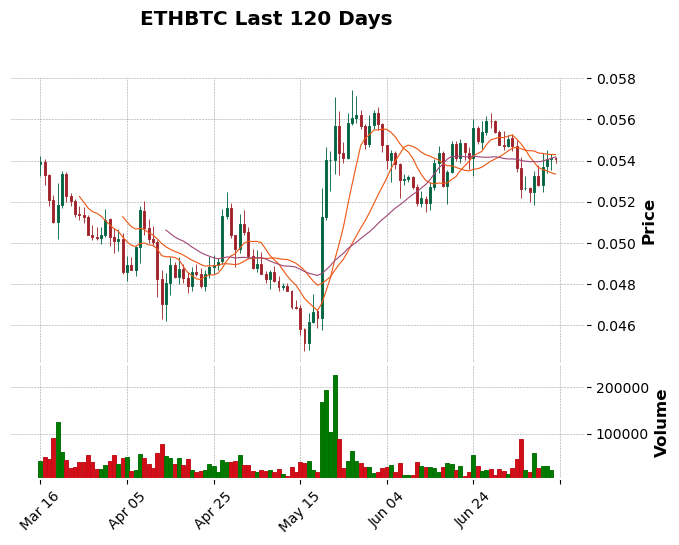

In [41]:
mpf.plot(hist_df.set_index('Close Time').tail(120), 
        type='candle', style='charles', 
        volume=True, 
        title='ETHBTC Last 120 Days', 
        mav=(10,20,30))